In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import time
import sys
import os   
import re
import importlib
import math
from datetime import datetime    
import sklearn
from sklearn import preprocessing
from scipy.spatial import Delaunay
from scipy import stats
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib widget



### Rig ref

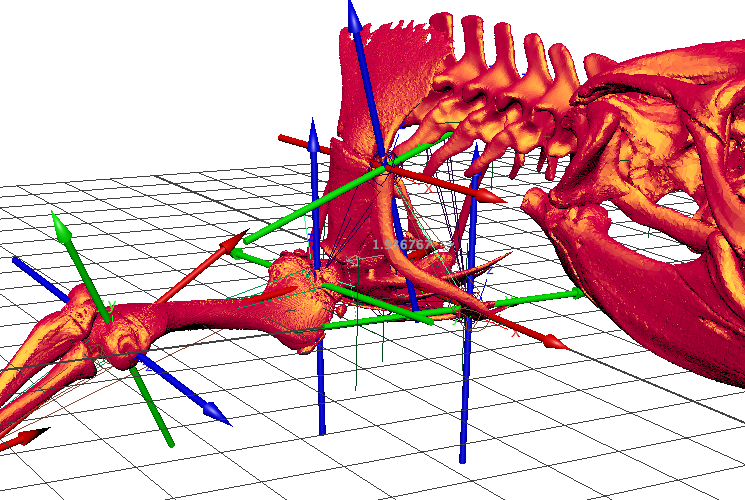


### Import data

In [2]:
raw_dfs = {}
raw_dfs['feb3_13_t2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Feb3_Lai/13_t2_stand_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['feb3_12_t2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Feb3_Lai/12_t2_stand_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['feb3_11_t1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Feb3_Lai/11_t1_stand_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['feb3_3_p1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Feb3_Lai/3_p1_stand_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['feb3_2_p3'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Feb3_Lai/2_p3_stand_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['nov1_5_t1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Nov1_LaiWright/5_t1_squeeze_A+_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['nov1_6_t4'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Nov1_LaiWright/6_t4_squeeze_A-_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['nov6_12_p1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Nov6_LaiBiewener/12_p1_squeezelow_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['nov6_9_p3'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Nov6_LaiBiewener/9_p3_squeezelow_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['nov6_3_p4'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Nov6_LaiBiewener/3_p4_squeezelow_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct7_21_t2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct7_LaiWright/21_t2_fullstride_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct7_9_t4'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct7_LaiWright/9_t4_fullstride_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct7_23_t3'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct7_LaiWright/23_t3_fullstride_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct7_12_t1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct7_LaiWright/12_t1_fullstride_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct7_20_t3'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct7_LaiWright/20_t3_fullstride_A_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct9_14_p1'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct9_LaiPierceBiewener/14_p1_fullstride_A-_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct9_9_p3'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct9_LaiPierceBiewener/9_p3_fullstride_A-_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct14_3_p2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct14_LaiBiewener/3_p2_fullstride_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct14_8_p4'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct14_LaiBiewener/8_p4_fullstride_a_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct16_9_p2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct16_LaiWright/9_p2_squeeze_A+_IK_baked_data.csv', 
                     index_col=None)
raw_dfs['oct23_2_t2'] = pd.read_csv('/Users/phil/Desktop/rotoscoping/Oct23_LaiWright/2_t2_squeeze_A-_IK_baked_data.csv', 
                     index_col=None)
raw_list = ['feb3_13_t2', 'feb3_12_t2', 'feb3_11_t1', 'feb3_3_p1', 'feb3_2_p3', 'nov1_5_t1', 
           'nov1_6_t4', 'nov6_12_p1', 'nov6_9_p3', 'nov6_3_p4', 'oct7_21_t2', 'oct7_9_t4', 
           'oct7_23_t3', 'oct7_12_t1', 'oct7_20_t3', 'oct9_14_p1', 'oct9_9_p3', 'oct14_3_p2', 
           'oct14_8_p4', 'oct16_9_p2', 'oct23_2_t2']
walking_list = [trial for trial in raw_list if 'feb3' not in trial]
standing_list = [trial for trial in raw_list if 'feb3' in trial]
tegu_lo = ['oct7_12_t1','oct7_21_t2','oct7_23_t3','oct7_9_t4']
tegu_hi = ['nov1_5_t1','oct23_2_t2','oct7_20_t3','nov1_6_t4']
opossum_lo = ['nov6_12_p1','oct16_9_p2','nov6_9_p3','nov6_3_p4']
opossum_hi = ['oct9_14_p1','oct14_3_p2','oct9_9_p3','oct14_8_p4']
raw_dict = {'tegu_lo':[raw_dfs[trial] for trial in tegu_lo],
            'tegu_hi':[raw_dfs[trial] for trial in tegu_hi],
            'opossum_lo':[raw_dfs[trial] for trial in opossum_lo],
            'opossum_hi':[raw_dfs[trial] for trial in opossum_hi]}


for raw_df in raw_dfs:
    raw_dfs[raw_df]['uid'] = raw_df+'_'+raw_dfs[raw_df].index.astype(str)
    raw_dfs[raw_df]['individual_id'] = raw_df.rsplit('_',1)[1]
    raw_dfs[raw_df]['species'] = np.where('p' in raw_dfs[raw_df]['individual_id'][0], 'Opossum','Tegu')
    raw_dfs[raw_df]['individual'] = raw_dfs[raw_df]['species'] + ' ' + raw_dfs[raw_df]['individual_id'].str[1:]
    raw_dfs[raw_df]['time_s'] = raw_dfs[raw_df]['frame']/60
    raw_dfs[raw_df]['dt_elapsed_s'] = (pd.to_datetime(raw_dfs[raw_df]['time_s'],unit='s')-datetime(1970, 1, 1))
#     # flip axes to match rob's left-hand coordinate system
#     raw_dfs[raw_df]['glenoid.rotateX'] *= -1
#     raw_dfs[raw_df]['elbow.rotateX'] *= -1
#     raw_dfs[raw_df]['glenoidTorque.XaxisTorque'] *= 1
#     raw_dfs[raw_df]['glenoidTorque.XaxisMomentArm'] *= 1
#     raw_dfs[raw_df]['elbowTorque.XaxisTorque'] *= 1
#     raw_dfs[raw_df]['elbowTorque.XaxisMomentArm'] *= 1
    
    
    raw_dfs[raw_df]['travel_velocity_X'] = np.diff(raw_dfs[raw_df]['animal.translateX'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['glenoid.angular_v_X'] = np.diff(raw_dfs[raw_df]['glenoid.rotateX'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['glenoid.angular_v_Y'] = np.diff(raw_dfs[raw_df]['glenoid.rotateY'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['glenoid.angular_v_Z'] = np.diff(raw_dfs[raw_df]['glenoid.rotateZ'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['elbow.angular_v_X'] = np.diff(raw_dfs[raw_df]['elbow.rotateX'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['elbow.angular_v_Y'] = np.diff(raw_dfs[raw_df]['elbow.rotateY'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['elbow.angular_v_Z'] = np.diff(raw_dfs[raw_df]['elbow.rotateZ'], prepend=np.nan)/np.diff(raw_dfs[raw_df]['time_s'], prepend=np.nan)
    raw_dfs[raw_df]['glenoid.power_X'] = raw_dfs[raw_df]['glenoid.angular_v_X']*raw_dfs[raw_df]['glenoidTorque.XaxisTorque']
    raw_dfs[raw_df]['glenoid.power_Y'] = raw_dfs[raw_df]['glenoid.angular_v_Y']*raw_dfs[raw_df]['glenoidTorque.YaxisTorque']
    raw_dfs[raw_df]['glenoid.power_Z'] = raw_dfs[raw_df]['glenoid.angular_v_Z']*raw_dfs[raw_df]['glenoidTorque.ZaxisTorque']
    raw_dfs[raw_df]['elbow.power_X'] = raw_dfs[raw_df]['elbow.angular_v_X']*raw_dfs[raw_df]['elbowTorque.XaxisTorque']
    raw_dfs[raw_df]['elbow.power_Y'] = raw_dfs[raw_df]['elbow.angular_v_Y']*raw_dfs[raw_df]['elbowTorque.YaxisTorque']
    raw_dfs[raw_df]['elbow.power_Z'] = raw_dfs[raw_df]['elbow.angular_v_Z']*raw_dfs[raw_df]['elbowTorque.ZaxisTorque']
    raw_dfs[raw_df]['glenoid.power'] = raw_dfs[raw_df]['glenoid.power_X']+raw_dfs[raw_df]['glenoid.power_Y']+raw_dfs[raw_df]['glenoid.power_Z']
    raw_dfs[raw_df]['elbow.power'] = raw_dfs[raw_df]['elbow.power_X']+raw_dfs[raw_df]['elbow.power_Y']+raw_dfs[raw_df]['elbow.power_Z']
    

    

In [3]:
## need to normalize distances to IGD or Hum len


## need joint locations!
elbow_pos = np.array(raw_dfs['oct16_9_p2'].filter(like='elbow.translate'))
glenoid_pos = np.array(raw_dfs['oct16_9_p2'].filter(like='glenoid.translate'))
wrist_pos = np.array(raw_dfs['oct16_9_p2'].filter(like='wrist.translate'))
elbow_glenoid = glenoid_pos - elbow_pos
elbow_wrist = wrist_pos - elbow_pos
limb_plane_normal = np.cross(elbow_glenoid, elbow_wrist)
parasagittality = np.cross([0,1,0],limb_plane_normal)

In [4]:
def cropToStance(df, footdown_frame, toeoff_frame, first_good_frame=None,last_good_frame=None):
    result = df.copy()
    mask = [col for col in result.columns if col not in ['frame','stance.percentage']]
    range_target = toeoff_frame-footdown_frame
    df_min = result['frame'].min()
    df_max = result['frame'].max()
    if df_min > footdown_frame:
        prepends = pd.DataFrame(np.nan, index=range(0,df_min-footdown_frame), columns=result.columns)
        prepends['frame'] = range(footdown_frame, df_min)
        result = pd.concat([prepends,result], ignore_index=True)
    if df_max < toeoff_frame:
        postpends = pd.DataFrame(np.nan, index=range(0,toeoff_frame-df_max), columns=result.columns)
        postpends['frame'] = range(df_max+1, toeoff_frame+1) 
        result = pd.concat([result,postpends], ignore_index=True)
    result['stance.percentage'] = (result['frame']-footdown_frame)/range_target 
    if first_good_frame:
        if first_good_frame>df_min:
            result.loc[result['frame']<first_good_frame,mask] = np.nan
    if last_good_frame:
        if last_good_frame<df_max:
            result.loc[result['frame']>last_good_frame,mask] = np.nan
    return result
    

cropToStance(test, 66,157, 73, 154)


NameError: name 'test' is not defined

### Filtering and time manipulations
- calculate angular velocity 
- find foot down and toe off frames from videos
- crop to stance range
- resample to 100

In [5]:
all_raw = pd.concat(raw_dfs)
smoothed_data = all_raw.copy()

sampling_f = 60
cutoff = 2/(800/60)*10  #10x frequency of motion per xromm guidelines
def make_butter(data, cutoff, sampling_f):
    b, a = signal.butter(4, cutoff, btype='lowpass', fs=sampling_f)
    y = signal.filtfilt(b, a, data)
    return y

# for trial_id in csv_dict.keys():
#     sampling_f = log.loc[trial_id,'ATI sampling (Hz)']
#     filt_norm_force_df.loc[trial_id,'FX_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FX_sum'], opt_cutoff, sampling_f)
#     filt_norm_force_df.loc[trial_id,'FY_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FY_sum'], opt_cutoff, sampling_f)
#     filt_norm_force_df.loc[trial_id,'FZ_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FZ_sum'], opt_cutoff, sampling_f)
#     ezplot(filt_norm_force_df.loc[trial_id])

In [10]:
test1 = {'dd':2}
test2 = test1.copy()
test2

{'dd': 2}

### 16 grid plot function

In [38]:
def make16plot(title, mixed_yScale=False):
    fig = plt.figure(figsize=[12,10])
    gs0 = gridspec.GridSpec(1, 4, figure=fig)
    def make4Stack(gs,i,title=''):
        fDict = {'fontsize':8}
        gsn = gs[i].subgridspec(4,1, hspace=0.25)
        gax0 = fig.add_subplot(gsn[0,0])
        gax1 = fig.add_subplot(gsn[1,0])
        gax2 = fig.add_subplot(gsn[2,0])
        gax3 = fig.add_subplot(gsn[3,0])
        for ax, i in zip([gax0, gax1, gax2, gax3],range(1,5)):
            ax.set_title(title+' '+str(i), fontdict=fDict)
            ax.tick_params(labelsize=5)
        return [gsn, gax0, gax1, gax2, gax3]
    gs00, tegu_lo_ax1, tegu_lo_ax2, tegu_lo_ax3, tegu_lo_ax4 = make4Stack(gs0, 0, 'Tegu Lo')
    gs01, tegu_hi_ax1, tegu_hi_ax2, tegu_hi_ax3, tegu_hi_ax4 = make4Stack(gs0, 1, 'Tegu Hi')
    gs02, possum_lo_ax1, possum_lo_ax2, possum_lo_ax3, possum_lo_ax4 = make4Stack(gs0, 2, 'Opossum Lo')
    gs03, possum_hi_ax1, possum_hi_ax2, possum_hi_ax3, possum_hi_ax4 = make4Stack(gs0, 3, 'Opossum Hi')
    axes_dict = {   'tegu_lo':[tegu_lo_ax1,tegu_lo_ax2,tegu_lo_ax3,tegu_lo_ax4],
                    'tegu_hi':[tegu_hi_ax1,tegu_hi_ax2,tegu_hi_ax3,tegu_hi_ax4],
                    'opossum_lo':[possum_lo_ax1,possum_lo_ax2,possum_lo_ax3,possum_lo_ax4],
                    'opossum_hi':[possum_hi_ax1,possum_hi_ax2,possum_hi_ax3,possum_hi_ax4]}
    if mixed_yScale:
        twin_dict = axes_dict.copy()
        for condition in twin_dict:
            new_axes = []
            for animal in twin_dict[condition]:
                new = animal.twinx()
                new.tick_params(labelsize=5)
                new_axes.append(new)
            twin_dict[condition] = new_axes
    plt.suptitle(title)
    plt.show()
    return axes_dict if not mixed_yScale else [axes_dict, twin_dict]



### Plot glenoid rotations

In [22]:
glenoid_rotations = make16plot('Glenoid rotations')
maxRot = all_raw.filter(like='glenoid.rotate').max().max()
minRot = all_raw.filter(like='glenoid.rotate').min().min()
for condition in raw_dict:
    for i in range(0,len(raw_dict[condition])):
        glenoid_rotations[condition][i].plot(raw_dict[condition][i]['glenoid.rotateX'], c='red')
        glenoid_rotations[condition][i].plot(raw_dict[condition][i]['glenoid.rotateY'], c='green')
        glenoid_rotations[condition][i].plot(raw_dict[condition][i]['glenoid.rotateZ'], c='blue')
        glenoid_rotations[condition][i].set_ylim(minRot, maxRot)
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
elbow_rotations = make16plot('Elbow rotations')
maxRot = all_raw.filter(like='elbow.rotate').max().max()
minRot = all_raw.filter(like='elbow.rotate').min().min()
for condition in raw_dict:
    for i in range(0,len(raw_dict[condition])):
        elbow_rotations[condition][i].plot(raw_dict[condition][i]['elbow.rotateX'], c='red')
        elbow_rotations[condition][i].plot(raw_dict[condition][i]['elbow.rotateY'], c='green')
        elbow_rotations[condition][i].plot(raw_dict[condition][i]['elbow.rotateZ'], c='blue')
        elbow_rotations[condition][i].set_ylim(minRot, maxRot)

plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [359]:
plt.close()
joint_widths = make16plot('Joint widths')
maxRot = all_raw.filter(regex='animal.[a-z]*Width').max().max()
minRot = all_raw.filter(regex='animal.[a-z]*Width').min().min()
for condition in raw_dict:
    for i in range(0,len(raw_dict[condition])):
        joint_widths[condition][i].plot(raw_dict[condition][i]['animal.shoulderWidth'], c='red')
        joint_widths[condition][i].plot(raw_dict[condition][i]['animal.elbowWidth'], c='green')
        joint_widths[condition][i].plot(raw_dict[condition][i]['animal.wristWidth'], c='blue')
        joint_widths[condition][i].set_ylim(minRot, maxRot)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [39]:
plt.close()
angle_params, length_param = make16plot('Sprawling parameters', mixed_yScale=True)
maxRot = all_raw.filter(regex='animal.spineBend|glenoid.rotateX').max().max()
minRot = all_raw.filter(regex='animal.spineBend|glenoid.rotateX').min().min()
maxLen = all_raw.filter(like='animal.shoulderHeight').max().max()
minLen = all_raw.filter(like='animal.shoulderHeight').min().min()

for condition in raw_dict:
    for i in range(0,4):
        angle_params[condition][i].plot(raw_dict[condition][i]['animal.spineBend'],c='orange')
        angle_params[condition][i].plot(raw_dict[condition][i]['glenoid.rotateX'],c='red')
        length_param[condition][i].plot(raw_dict[condition][i]['animal.shoulderHeight'],c='purple')
        angle_params[condition][i].set_ylim(minRot, maxRot)
        length_param[condition][i].set_ylim(minLen, maxLen)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …